# Application of Machine Learning Algos

### Data Source - Kaggle
https://www.kaggle.com/c/petfinder-adoption-prediction/data

In [120]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Loading data, and supporting data

In [121]:
df = pd.read_csv('train.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [123]:
breed_df = pd.read_csv('BreedLabels.csv')
color_df = pd.read_csv('ColorLabels.csv')
state_df = pd.read_csv('StateLabels.csv')

In [124]:
#df['Name'].fillna('No Name', inplace=True)
df.drop(['Name','RescuerID', 'PetID', 'Description', 'Breed1', 'Breed2'], axis=1, inplace=True)

In [125]:
df.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2


In [126]:
#df['Description'].fillna('No Description', inplace=True)

In [127]:
df.replace({'Type' : {1:'dog' , 2: 'cat'},
            'Gender' : {1:'male', 2:'female', 3:'mixed'},
            #'MaturitySize' : {1:'small', 2:'medium', 3:'large', 4:'extra_large', 0:'not_specified'}, ### maybe keep/change
            'FurLength' :{1:'short', 2:'medium', 3:'long', 0:'not_specified'},
            'Vaccinated' :{1:'yes', 2:'no', 3:'not_sure'},
            'Dewormed' :{1:'yes', 2:'no', 3:'not_sure'},
            'Sterilized' :{1:'yes', 2:'no', 3:'not_sure'},
            'Health' :{1:'healthy', 2:'minor_injury', 3:'serious_injury', 0:'not_specified'},
           },
           inplace = True)


### Testing the effect of treating age as a catagorical feature

In [128]:
df.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,cat,3,male,1,7,0,1,short,no,no,no,healthy,1,100,41326,0,1.0,2
1,cat,1,male,1,2,0,2,medium,not_sure,not_sure,not_sure,healthy,1,0,41401,0,2.0,0
2,dog,1,male,2,7,0,2,medium,yes,yes,no,healthy,1,0,41326,0,7.0,3
3,dog,4,female,1,2,0,2,short,yes,yes,no,healthy,1,150,41401,0,8.0,2
4,dog,1,male,1,0,0,2,short,no,no,no,healthy,1,0,41326,0,3.0,2


In [129]:
df = df.astype({'Age': 'int'})

### Replacing the breed, color, and state ID number with the catagorical name

In [130]:
breed_dict = {}
for i in range(len(breed_df)):
    breed_dict[breed_df.BreedID[i]]= breed_df.BreedName[i]
breed_dict[0] = 'Not_specified'

In [131]:
df.replace({'Breed1' : breed_dict, 'Breed2': breed_dict}, inplace=True)

In [132]:
color_dict = {}
for i in range(len(color_df)):
    color_dict[color_df.ColorID[i]]= color_df.ColorName[i]
color_dict[0] = 'Not_specified'

In [133]:
df.replace({'Color1' : color_dict, 'Color2': color_dict, 'Color3': color_dict}, inplace=True)

In [134]:
state_dict = {}
for i in range(len(state_df)):
    state_dict[state_df.StateID[i]]= state_df.StateName[i]
state_dict[0] = 'Not_specified'

In [135]:
df.replace({'State': state_dict}, inplace=True)

### Reducing target to 2 unique values


In [136]:
df.replace({'AdoptionSpeed': {1:0, 2:0}}, inplace=True) ### under 30 days
df.replace({'AdoptionSpeed': {3:1, 4:1}}, inplace=True) ### over 30 days

In [137]:
df.replace({'AdoptionSpeed': {0: 'Under_30'}}, inplace=True)
df.replace({'AdoptionSpeed': {1: 'Over_30'}}, inplace=True)
df['AdoptionSpeed'] = df['AdoptionSpeed'].astype('str')


### Inspecting the details DataFrame

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 18 columns):
Type             14993 non-null object
Age              14993 non-null int64
Gender           14993 non-null object
Color1           14993 non-null object
Color2           14993 non-null object
Color3           14993 non-null object
MaturitySize     14993 non-null int64
FurLength        14993 non-null object
Vaccinated       14993 non-null object
Dewormed         14993 non-null object
Sterilized       14993 non-null object
Health           14993 non-null object
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null object
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null object
dtypes: float64(1), int64(5), object(12)
memory usage: 2.1+ MB


In [139]:
df.describe()

,Age,MaturitySize,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.862002,1.576069,21.259988,0.056760,3.889215
std,18.155790,0.547959,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,2.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,4.000000,20.000000,3000.000000,8.000000,30.000000


In [140]:
#sns.pairplot(df, hue='AdoptionSpeed', palette= 'pastel')

### Does the length of the description impact the adoption speed? - Not really... not in a predictive means

In [141]:
#df['Description_len'] = [len(df.Description[i]) for i in range(len(df.Description))]
#df.drop('Description', inplace=True, axis=1)

### Elementary Exploratory Data Analysis
#### Confirming that puppies and kitties get adopted more frequently...

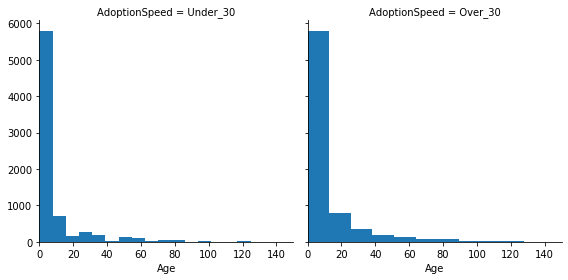

In [185]:
grid = sns.FacetGrid(df, col='AdoptionSpeed', size=4, xlim=(0,150))
grid.map(plt.hist, 'Age', bins=20);

In [195]:
### Adoption location
df_cat.groupby('State')['AdoptionSpeed'].count()

NameError: name 'df_cat' is not defined

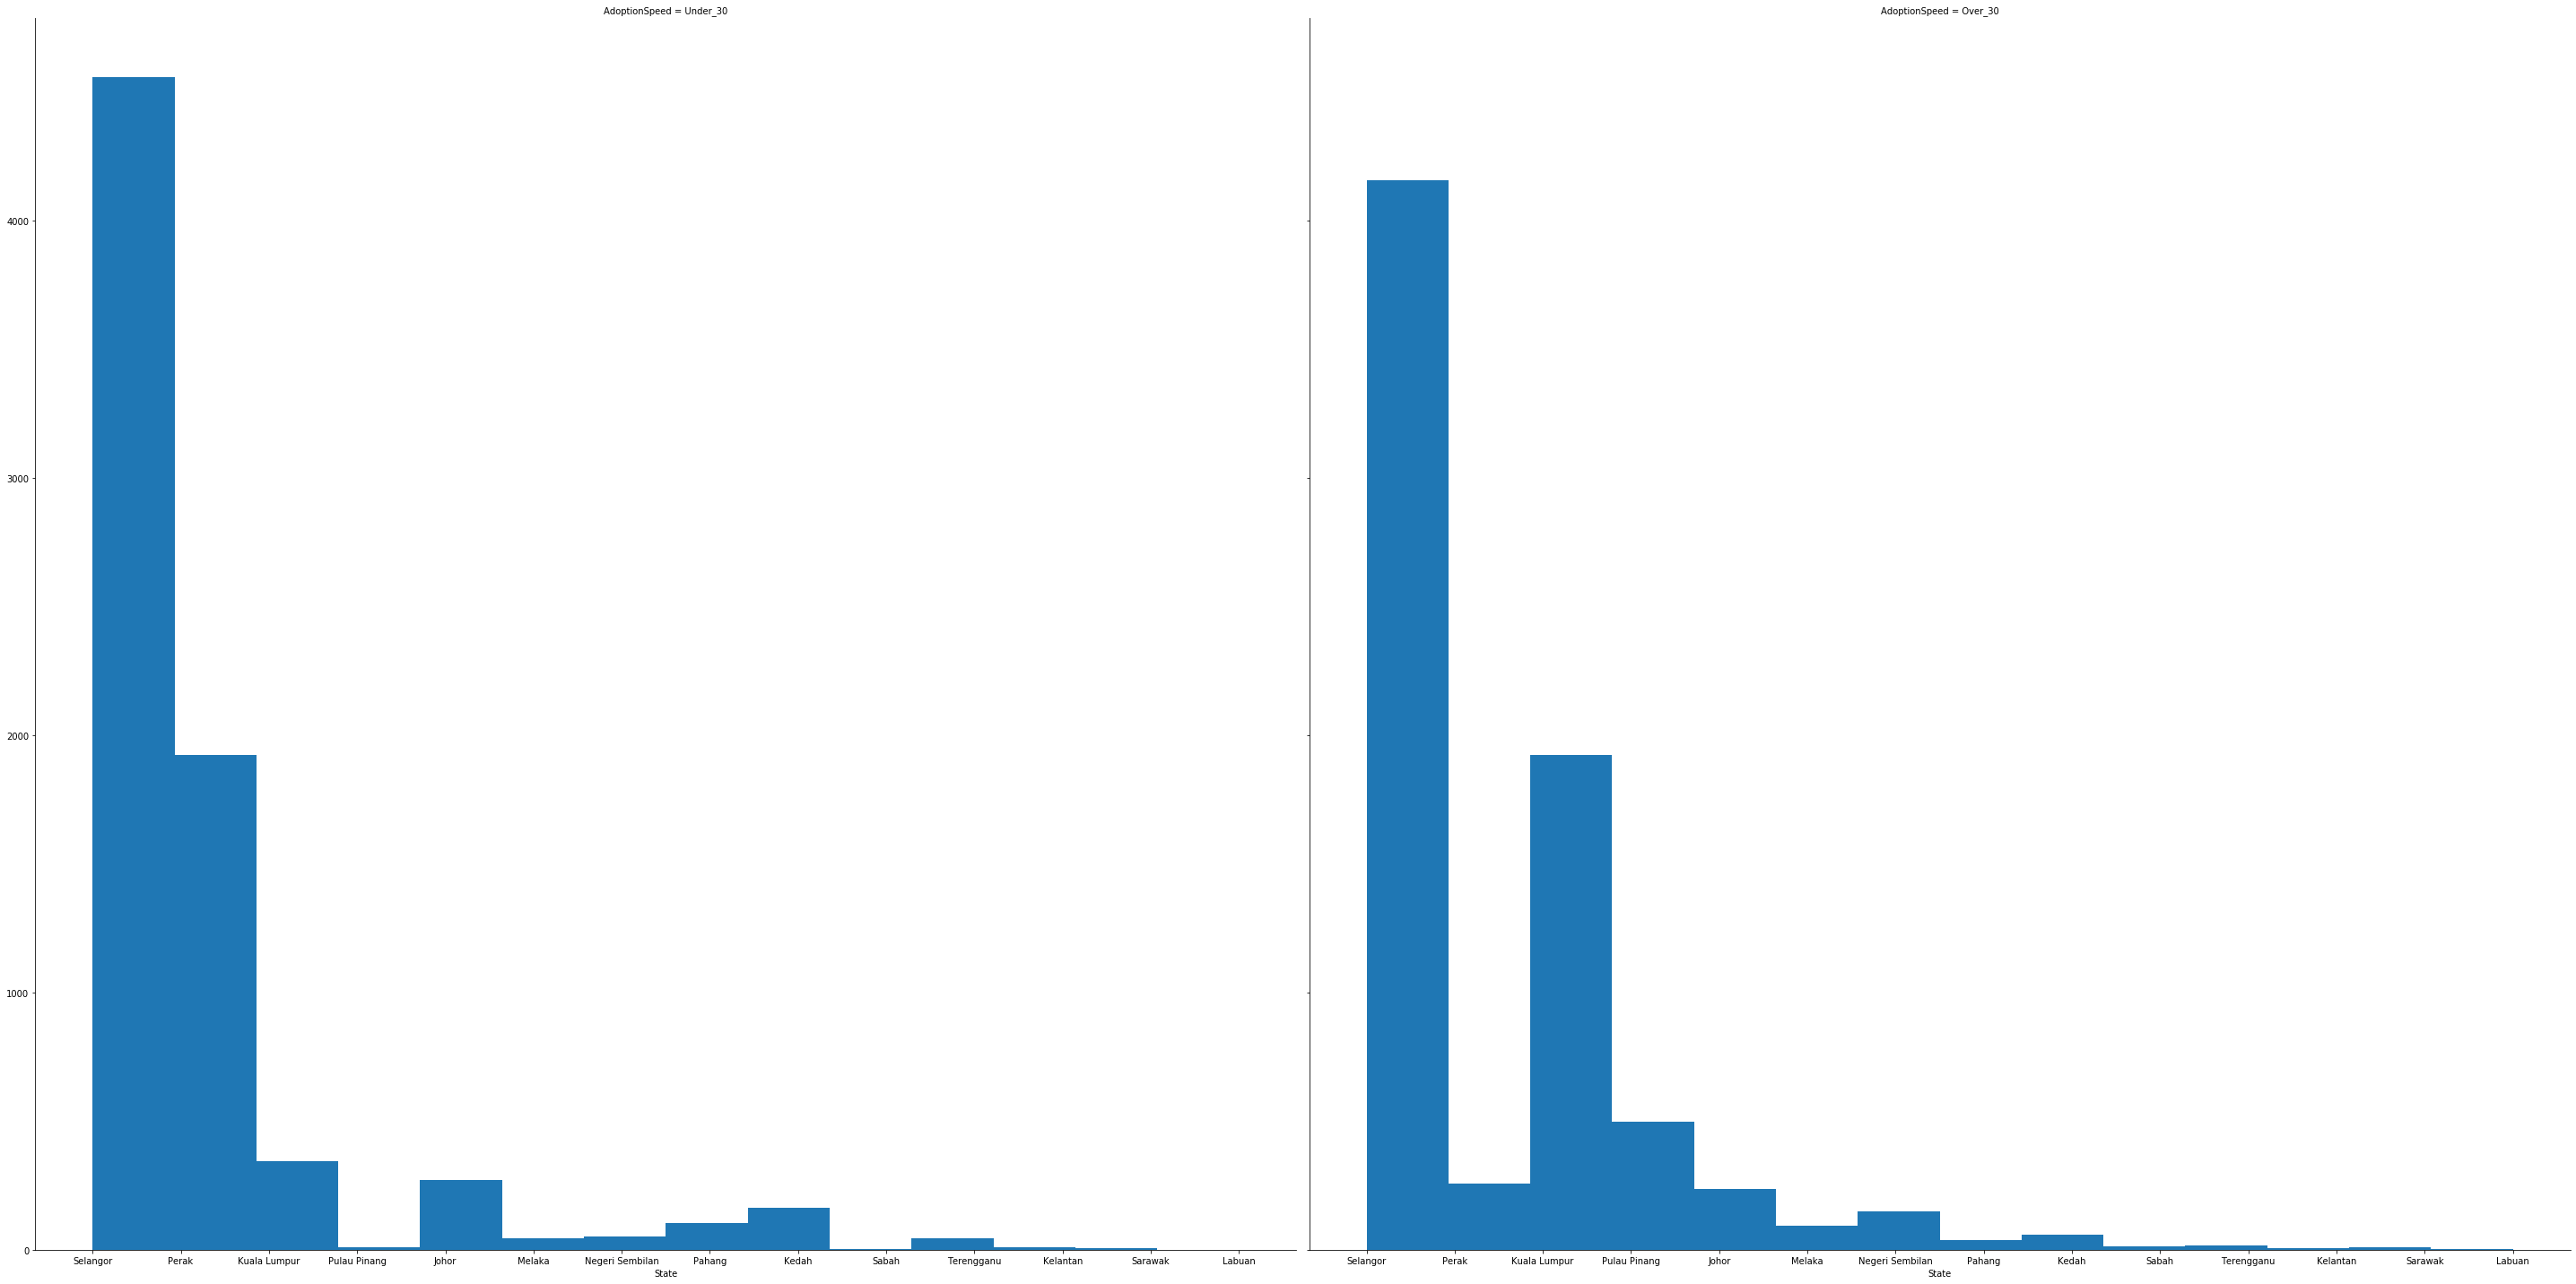

In [191]:
grid = sns.FacetGrid(df, col='AdoptionSpeed', size=20,)
grid.map(plt.hist, 'State', bins=14);

#### Do the number of pictures matter? - Possibly...

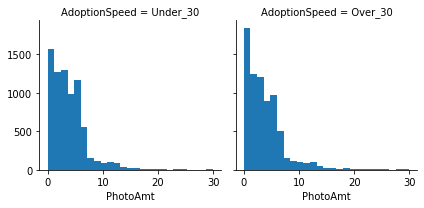

In [143]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'PhotoAmt', bins=25);

#### How about the size of the cat/dog? - Looks like small animals spend less time in the system - medium animals tend to spend over 30 days in the system

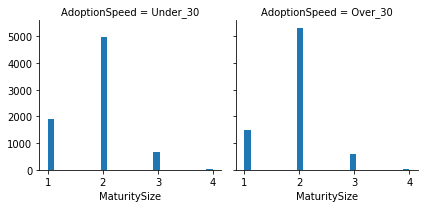

In [144]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'MaturitySize', bins=25);

#### Fur length? Medium good - Short bad

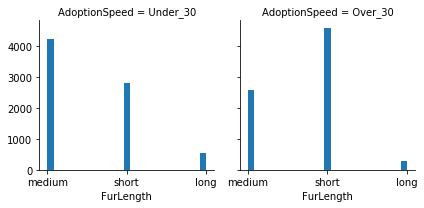

In [145]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'FurLength', bins=25);

#### Quantity of animals listed - Thought bigger groups would take longer to place, but it doesn't appear so...

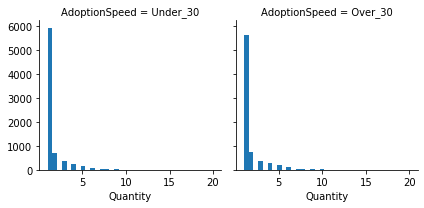

In [146]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'Quantity', bins=35);

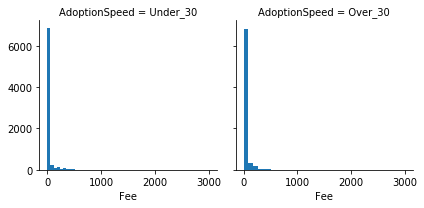

In [147]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'Fee', bins=35);

#### Dogs vs Cats

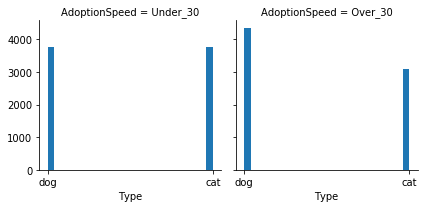

In [148]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'Type', bins=25);

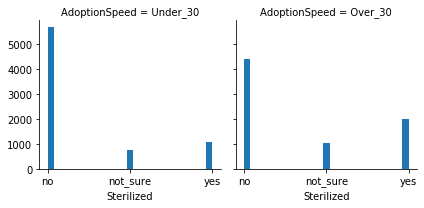

In [149]:
grid = sns.FacetGrid(df, col='AdoptionSpeed')
grid.map(plt.hist, 'Sterilized', bins=25);

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


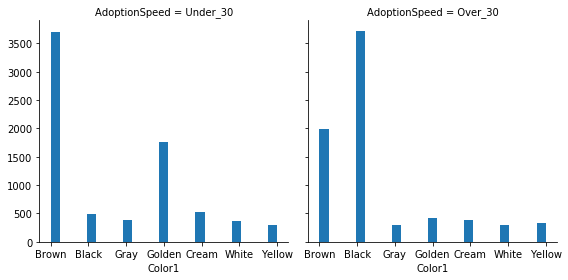

In [150]:
grid = sns.FacetGrid(df, col='AdoptionSpeed', size=4)
grid.map(plt.hist, 'Color1', bins=25);

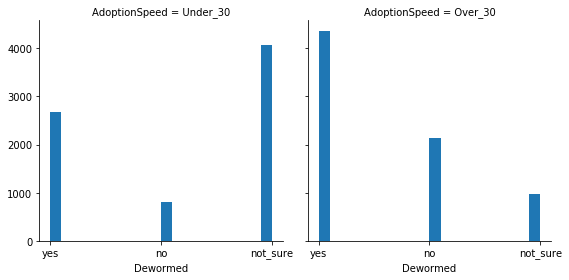

In [151]:
grid = sns.FacetGrid(df, col='AdoptionSpeed', size=4)
grid.map(plt.hist, 'Dewormed', bins= 20);

### Numerical Pre-Processing

In [152]:
df.describe()


,Age,MaturitySize,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.862002,1.576069,21.259988,0.056760,3.889215
std,18.155790,0.547959,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,2.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,4.000000,20.000000,3000.000000,8.000000,30.000000


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats

#ss = StandardScaler()
mms = MinMaxScaler()

df_num = df.select_dtypes('int')
df_num = df_num.astype('float')

df_tran = np.log(df_num + .1)
#df_tran = df_num

#df_num_cox['Age'] = boxcox(df_num['Age'])
#df_num_cox['Age'] = scipy.stats.boxcox(df_num['Age'])[0]

df_tran_ss = pd.DataFrame(mms.fit_transform(df_tran))
df_tran_ss.columns = df_num.columns

df_tran_ss = df_tran_ss[(np.abs(scipy.stats.zscore(df_tran_ss)) < 2.5).all(axis=1)] # Rows: 14993 -> 12957
#df_tran_ss = df_tran


In [154]:
df_tran_ss.describe()

,Age,MaturitySize,Quantity,Fee,VideoAmt
count,12689.000000,12689.000000,12689.000000,12689.000000,12689.0
mean,0.488261,0.406256,0.058577,0.062643,0.0
std,0.144733,0.230571,0.126962,0.183505,0.0
min,0.305689,0.000000,0.000000,0.000000,0.0
25%,0.388122,0.491479,0.000000,0.000000,0.0
50%,0.437772,0.491479,0.000000,0.000000,0.0
75%,0.588345,0.491479,0.000000,0.000000,0.0
max,0.875544,0.787497,0.452837,0.691794,0.0


## Getting Dummy columns for catagorical features

In [155]:
df_dum = pd.get_dummies(df.select_dtypes('object'), drop_first=True)

In [156]:
### to replace with 'No_names'
#'No Name Yet' , 'Unknown', 'No Names Yet' ----- Not including Names.

In [157]:
#for i in range(len(df.Name.value_counts())):
 #   print(df.Name.value_counts().keys()[i], df.Name.value_counts().values[i])

### Merging numeric and catagorical

In [158]:
df_num_cat = pd.merge(df_tran_ss, df_dum, right_index= True, left_index= True)

In [159]:
print(df_num_cat.shape)
df_num_cat.head()


(12689, 49)


,Age,MaturitySize,Quantity,Fee,VideoAmt,Type_dog,Gender_male,Gender_mixed,Color1_Brown,Color1_Cream,...,State_Melaka,State_Negeri Sembilan,State_Pahang,State_Perak,State_Pulau Pinang,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,AdoptionSpeed_Under_30
0,0.437772,0.000000,0.0,0.670168,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.305689,0.491479,0.0,0.000000,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.305689,0.491479,0.0,0.000000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.305689,0.491479,0.0,0.000000,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0.437772,0.491479,0.0,0.000000,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


### Evaluating models

In [160]:
import sklearn.model_selection

#train_test_split
#KFold
X = df_num_cat.drop('AdoptionSpeed_Under_30', axis=1)
y = df_num_cat['AdoptionSpeed_Under_30']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=.75, random_state=2)

In [161]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_train.head()

(9516, 48)
(9516,)
(3173, 48)
(3173,)


4642     0
11512    0
10552    0
8215     0
11387    1
Name: AdoptionSpeed_Under_30, dtype: uint8

In [162]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test), 4)
acc_svc #0.634

0.6183

In [163]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test), 4)
acc_knn 
#0.5827

0.5774

In [164]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test), 4)
acc_gaussian 
#0.4967

0.5594

In [165]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test), 4)
acc_linear_svc 
#0.6373

0.6174

In [166]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test), 4)
acc_sgd 
#0.6433

0.6136

In [167]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test), 4)
acc_decision_tree 
##0.586

0.5786

In [168]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test), 4)
acc_random_forest 
#0.634

0.6183

### XGBoost 

In [169]:
import xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [187]:
XGBoost = XGBClassifier(max_depth=8, n_estimators=100)
XGBoost.fit(X_train, y_train)

y_pred = XGBoost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
XGBoost_score = round(accuracy, 4)
print(XGBoost_score)

0.6325


In [171]:
XGBoost_score

0.6325

In [172]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_svc, acc_knn,
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree, XGBoost_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,XGBoost,0.6325
0,Support Vector Machines,0.6183
2,Random Forest,0.6183
5,Linear SVC,0.6174
4,Stochastic Gradient Decent,0.6136
6,Decision Tree,0.5786
1,KNN,0.5774
3,Naive Bayes,0.5594


## Need NLP, Computer Vision, and Neural Networks to improve the model further

### Imporance of Features

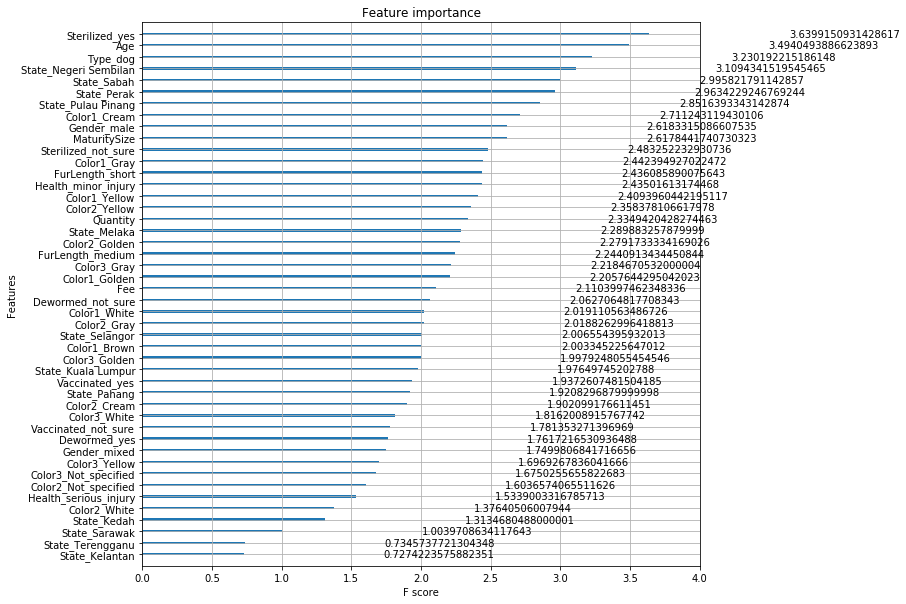

In [188]:
XGBoost.fit(X,y)
ax = plot_importance(XGBoost, importance_type= 'gain', show_values=True)
fig = ax.figure
fig.set_size_inches(10, 10)



In [174]:
'''

_____________________________________
7	XGBoost	0.3844
0	Support Vector Machines	0.3568
2	Random Forest	0.3553
5	Linear SVC	0.3492
6	Decision Tree	0.3446
4	Stochastic Gradient Decent	0.3277
1	KNN	0.3185
3	Naive Bayes	0.2144

Target untouched [0,1,2,3,4] ---BAD
______________________________________
7	XGBoost	0.6692
2	Random Forest	0.6478
5	Linear SVC	0.6064
0	Support Vector Machines	0.5957
4	Stochastic Gradient Decent	0.5957
6	Decision Tree	0.5819
1	KNN	0.5666
3	Naive Bayes	0.5421

Dumped Breed1, Breed2, and left MaturitySize as a numeric, changed max depth XGB to 10...
_______________________________________

7	XGBoost	0.6620
5	Linear SVC	0.6404
2	Random Forest	0.6358
4	Stochastic Gradient Decent	0.6235
0	Support Vector Machines	0.5972
1	KNN	0.5772
6	Decision Tree 0.5710
3	Naive Bayes	0.5494

XGB max_depth 3 -> 5
_______________________________________
7	XGBoost	0.6512
5	Linear SVC	0.6404
2	Random Forest	0.6358
4	Stochastic Gradient Decent	0.6235
0	Support Vector Machines	0.5972
1	KNN	0.5772
6	Decision Tree	0.5710
3	Naive Bayes	0.5494

Remove outliers
_______________________________________
7   XGBoost	0.6400
5	Linear SVC	0.6347
2	Random Forest	0.6253
0	Support Vector Machines	0.6200
4	Stochastic Gradient Decent	0.6053
1	KNN	0.5947
6	Decision Tree	0.5893
3	Naive Bayes	0.4733
'''

'\n\n_____________________________________\n7\tXGBoost\t0.3844\n0\tSupport Vector Machines\t0.3568\n2\tRandom Forest\t0.3553\n5\tLinear SVC\t0.3492\n6\tDecision Tree\t0.3446\n4\tStochastic Gradient Decent\t0.3277\n1\tKNN\t0.3185\n3\tNaive Bayes\t0.2144\n\nTarget untouched [0,1,2,3,4] ---BAD\n______________________________________\n7\tXGBoost\t0.6692\n2\tRandom Forest\t0.6478\n5\tLinear SVC\t0.6064\n0\tSupport Vector Machines\t0.5957\n4\tStochastic Gradient Decent\t0.5957\n6\tDecision Tree\t0.5819\n1\tKNN\t0.5666\n3\tNaive Bayes\t0.5421\n\nDumped Breed1, Breed2, and left MaturitySize as a numeric, changed max depth XGB to 10...\n_______________________________________\n\n7\tXGBoost\t0.6620\n5\tLinear SVC\t0.6404\n2\tRandom Forest\t0.6358\n4\tStochastic Gradient Decent\t0.6235\n0\tSupport Vector Machines\t0.5972\n1\tKNN\t0.5772\n6\tDecision Tree 0.5710\n3\tNaive Bayes\t0.5494\n\nXGB max_depth 3 -> 5\n_______________________________________\n7\tXGBoost\t0.6512\n5\tLinear SVC\t0.6404\n2\tR